# Executive Summary of Our Project

The condition of ICU patients can change rapidly, sometimes leading to critical deterioration. However, little changes in vital signs such as heart rate and blood pressure often precede these rapid declines. By applying data analysis techniques and predictive machine learning models, these early signals can be detected.

Using historical data from clinical databases like MIMIC-III, these models can predict potential critical events, allowing hospitals to intervene earlier and offer timely treatment, significantly improving patient survival rates. Specifically, our project focus on predicting 30 day mortality for ICU patients based on their medical history, demographic features, laboratory test results during ICU stay and vital sign collected at early stages of the patients' ICU stay.  

## Decision to be impacted
The project will influence medical decisions related to early intervention strategies in ICU. We hope to establish a model that can help doctors and nurses to do some medical treatments for patients in advance to avoid the rapid health declines or adjust patient care protocols before a critical health event occurs, based on predictive analytics. Additionally, we aim to further assess and model the impact of medical interventions in the ICU, with the goal of developing an optimal treatment strategy to be integrated into the clinical decision support system.


## Business and social value
The social and business value of this project is that it can reduce ICU death rates and improving overall patient care. Timely interventions can prevent deteriorations, leading to better resource allocation in hospitals, reduced ICU stays, and lower healthcare costs. People prefer to pay for a high cost for even increasing 1% likelihood of survival. Therefore, such prediction technology will surely be welcome in any kind of medical organizations. Moreover, this technology can also be used in some healthy detections’ equipment like iWatch to avoid sudden death (which occurs frequently in recently years for over-workload young people or people who have specific diseases like heart attack).

## Data asset

Our project will be based on MIMIC-III dataset [2], a large database compromising health-related data collected from patients who stayed in ICU of Beth Israel Deaconess Medical Center between 2001 and 2012. MIMIC- III includes deidentified data of over 4000 patients and detailed clinical information such as demographics, vital sign measurements on an hourly basis, laboratory test results, encoded medical procedures, medications, caregiver notes, imaging reports, discharge and mortality. 
MIMIC-III is widely recognized and extensive used in academic research in fields like healthcare data analysis, clinical decision-rule improvement and medical informatics. It provides rich information analyzing patient outcomes, treatment effectiveness, and disease progression, supporting a diverse range of analytic. Also, its scale and depth allow us to train more complicated predictive models to improve our insight on ICU healthcare. 


# Literature Review of Mortality Prediction on MIMIC-iii Dataset

Various studies have explored predicting ICU mortality using the MIMIC-III database. Most studies focus on predicting mortality for patients for one specific group of patients, most commonly patients with heart failure or sepsis. Sadeghi et al., Ashrafi et al., and Li et al. focus on predicting in-hospital mortality for heart failure patients. Hou et al. and Tsiklidis et al. apply gradient boosting based machine learning models to predict mortality of patients with sepsis. There are also studies focusing on broader ICU populations and making general ICU mortality prediction. Dai et al. analyze disease characteristics across adult patients in the MIMIC-III to identify critical mortality factor. Liu et al. construct a nomogram based on LASSO regression and SOFA scores, simplifying mortality predictions while maintaining high accuracy.

For the features used in these studies, most study utilize both demographic and clinical features like comorbidities, vital signs and laboratory results. Liu et al. and Hou et al. also introduce clinical scores like SAPS-II score or SOFA score into their model. Notably, Sadeghi et al. rely solely on the heart signal from the first hour of ICU admission to achieve considerably good performance in predicting ICU mortality.

In regards of the methodology in these researches, machine learning models, particularly XGBoost and LASSO regression, have been widely adopted due to their ability to handle large, complex datasets. LASSO also emerges as a common feature selection method, particularly for models incorporating both clinical and laboratory data. Liu et al. and Hou et al. combine their model with experience-based clinical score systems like SAPS-II and use nomograms to translating complex models into clinician-friendly tools. Sadeghi et al. focus on time series analysis and train machine learning models after constructing features like windowed energy spectral density. Finally, most models are evaluated by machine learning metrics like AUC score, achieving an AUC from 0.85 to 0.93 specific to their task. Other metrics like clinical impact curves, calibration, and survival probability trajectories are also applied in several studies.


# Data Processing

## Database
We used the Medical Information Mart for Intensive Care III database version 1.4 (MIMIC III v1.4) for our study, a large database compromising health-related data collected from patients who stayed in ICU of Beth Israel Deaconess Medical Center between 2001 and 2012. MIMIC- III includes deidentified data of 46520 patients and detailed clinical information such as demographics, vital sign measurements on an hourly basis, laboratory test results, encoded medical procedures, medications, caregiver notes, imaging reports, discharge and mortality.


## Study Population

We determine our study population using the following inclusion and exclusion criterions. 

The inclusion criterion are: 

a) patients aged over 18 years old at admission

b) length of stay in the ICU was over 24 hours to ensure data integrity of vital signs. 


We excluded records based on two criteria:

a) Since MIMIC-III has a high dimension of features, and patients may not take all of the medical measurements during their ICU stay, we excluded patients with over 20\% feature values missing after our feature extraction procedure.

b) If a patient is admitted to ICU multiple times in the dataset, we excluded records except for the first time.
These criteria resulted in a study population of 30323 patients.


## Data Extraction

We first extract demographic features as follows: age, gender, ethnicity, weight, height and body mass index (BMI), length of stay in the ICU, hospital expire flag at the first ICU admission. Afterwards, we collect vital signals of heart rate, blood pressure, respiratory rate, temperature and SpO2 from related tables and compute the mean, maximum and minimum of these values in the first 24 hours of patients ICU stay. 

We also collect various laboratory test results, including White Blood Cell Count (WBC), Hemoglobin, Hematocrit, Platelet Count (Platelets), Glucose, Creatinine, Blood Urea Nitrogen (BUN), Sodium, Potassium, Chloride, Carbon Dioxide (CO2). Features of these laboratory test results are also generated by calculating mean, maximum and minimum during the whole ICU stay. We also extract whether a patient receives mechanical ventilation and has comorbidities (diabetes and malignant tumor). Detailed data extraction pipeline is shown in the diagram below:

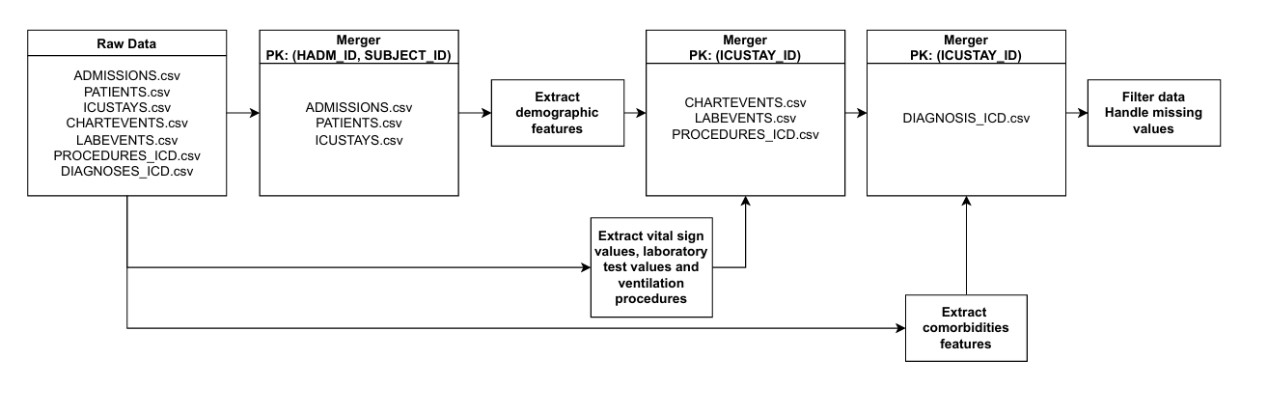



## Outlier Detection and Data Cleaning

In analyzing the MIMIC-III dataset, addressing outliers is a critical step to ensure the validity and reliability of the results. Outliers can distort statistical analyses and lead to misleading conclusions. We categorized outliers into two types: invalid outliers and extreme outliers.


### Invalid Outliers
Invalid outliers are data points that fall outside the plausible range of values for a given medical feature, often due to measurement errors or data entry mistakes. Identifying these outliers requires expert knowledge to define the valid physiological ranges accurately. Given the complexity of medical data and the variability among individual patients, determining these ranges without specialist input is challenging. Therefore, we did not handle invalid outliers in this study to avoid introducing bias or inaccuracies that could arise from incorrect assumptions about what constitutes a valid value.

### Extreme Outliers
Extreme outliers are valid data points that are statistically distant from the majority of the data. These can significantly influence statistical analyses, such as mean and standard deviation, potentially skewing the results. To address extreme outliers, we employed a quantile-based approach. Specifically, we calculated the lower and upper 25th quantiles for each continuous variable and caculated the range between them. Data points falling far out of the interval (3 times of the range) were considered extreme outliers and were excluded from the analysis. After excluding records with extreme outliers, we obtain a valid study population of 14022 patients.


### Missing Values

After dropping out records with extreme outliers, we imputed missing values with mean of population for continuous features and mode of population for categorical features.



# Code for Data Processing

Code for data processing takes 10 pages long in pdf format as MIMIC-iii is a complex medical dataset, hence source code is ommitted in our mid-semester report. Refer to 

In [ ]:
import pandas as pd
import numpy as np
import os

data_dir = 'mimic-iii-clinical-database-1.4/' 

def get_all_patients():
    admissions = pd.read_csv(os.path.join(data_dir, 'ADMISSIONS.csv'),
                             usecols=['SUBJECT_ID', 'HADM_ID'],
                             dtype={'SUBJECT_ID': int, 'HADM_ID': int})
    
    # Drop duplicates to consider only the first admission for each patient
    admissions = admissions.drop_duplicates(subset=['SUBJECT_ID'], keep='first')

    return admissions

# Extract demographic data
def get_demographics(hadm_ids):
    patients = pd.read_csv(os.path.join(data_dir, 'PATIENTS.csv'),
                           parse_dates=['DOB'],
                           dtype={'SUBJECT_ID': int})

    admissions = pd.read_csv(os.path.join(data_dir, 'ADMISSIONS.csv'),
                             parse_dates=['ADMITTIME', 'DISCHTIME', 'DEATHTIME'],
                             dtype={'SUBJECT_ID': int, 'HADM_ID': int, 'HOSPITAL_EXPIRE_FLAG': int})

    icustays = pd.read_csv(os.path.join(data_dir, 'ICUSTAYS.csv'),
                           parse_dates=['INTIME', 'OUTTIME'],
                           dtype={'SUBJECT_ID': int, 'HADM_ID': int, 'ICUSTAY_ID': int})

    # Filter to only consider the first ICU stay for each patient
    icustays = icustays.sort_values(by=['SUBJECT_ID', 'INTIME']).drop_duplicates(subset=['SUBJECT_ID'], keep='first')

    # Exclude ICU stays under 24 hours
    icustays['LOS_ICU'] = (icustays['OUTTIME'] - icustays['INTIME']).dt.total_seconds() / 86400
    icustays = icustays[icustays['LOS_ICU'] >= 1]  # Keep ICU stays >= 24 hours

    admissions = admissions[admissions['HADM_ID'].isin(hadm_ids)]
    icustays = icustays[icustays['HADM_ID'].isin(hadm_ids)]

    demographics = admissions.merge(patients, on='SUBJECT_ID', how='left')
    demographics = demographics.merge(icustays, on=['SUBJECT_ID', 'HADM_ID'], how='left')
    
    # Age calculation
    # demographics['DOB'] = pd.to_datetime(demographics['DOB'], errors='coerce').dt.year
    # demographics['ADMITTIME'] = pd.to_datetime(demographics['ADMITTIME'], errors='coerce').dt.year
    # demographics['AGE'] = demographics['ADMITTIME'] - demographics['DOB']
    demographics['DOB'] = pd.to_datetime(demographics['DOB'], errors='coerce').dt.year
    ADMITTIME_var= pd.to_datetime(demographics['ADMITTIME'], errors='coerce').dt.year
    demographics['AGE'] = (ADMITTIME_var - demographics['DOB'])#.dt.days / 365.25

    demographics.loc[demographics['AGE'] < 0, 'AGE'] = np.nan  # Correct negative ages
    demographics.loc[demographics['AGE'] > 300, 'AGE'] = 90  # De-identification in MIMIC-III
    
    # Encode Gender (Male = 1, Female = 0)
    demographics['GENDER'] = demographics['GENDER'].map({'M': 1, 'F': 0})

    # Encode Ethnicity into specified categories
    ethnicity_map = {
        'ASIAN': 'Asian',
        'WHITE': 'White',
        'BLACK': 'Black',
        'HISPANIC': 'Hispanic',
        'UNKNOWN/NOT SPECIFIED':'Unknown'
        # All other ethnicities to be classified as 'Other'
    }
    demographics['ETHNICITY'] = demographics['ETHNICITY'].str.upper()
    demographics['ETHNICITY'] = demographics['ETHNICITY'].apply(
        lambda x: next((v for k, v in ethnicity_map.items() if k in x), 'Other')
    )
    demographics['ETHNICITY'] = demographics['ETHNICITY'].fillna('Unknown')

    # Select required columns
    demographics['LOS_HOSPITAL'] = (demographics['DISCHTIME'] - demographics['ADMITTIME']).dt.total_seconds() / 86400
    demographics['LOS_ICU'] = (demographics['OUTTIME'] - demographics['INTIME']).dt.total_seconds() / 86400
    weight_item_ids_kg = [224639, 226512,3580]  # ITEMIDs for weight in kilograms
    weight_item_ids_lb = [ 3581,26531]  # ITEMIDs for weight in pounds
    height_item_ids_cm = [226730]  # ITEMIDs for height in centimeters
    height_item_ids_inch = [1394,226707]  # ITEMIDs for height in inches

    # Read CHARTEVENTS in chunks to get weight and height
    weight_height = []
    chunksize = 10 ** 6
    for chunk in pd.read_csv(os.path.join(data_dir, 'CHARTEVENTS.csv'),
                             chunksize=chunksize,
                             parse_dates=['CHARTTIME'],
                             usecols=['SUBJECT_ID', 'ITEMID', 'VALUENUM','CHARTTIME'],
                             dtype={'SUBJECT_ID': int, 'ITEMID': int, 'VALUENUM': float}):
        # Filter for weight and height ITEMIDs
        chunk = chunk[chunk['ITEMID'].isin(weight_item_ids_kg + weight_item_ids_lb + height_item_ids_cm + height_item_ids_inch)]
        weight_height.append(chunk)

    # Concatenate chunks
    if weight_height:
        weight_height = pd.concat(weight_height, ignore_index=True)
    else:
        weight_height = pd.DataFrame(columns=['SUBJECT_ID', 'ITEMID', 'VALUENUM'])

    # Standardize weight and height
    weight_height['FEATURE'] = np.where(weight_height['ITEMID'].isin(weight_item_ids_kg), 'WEIGHT_KG', 
                                        np.where(weight_height['ITEMID'].isin(weight_item_ids_lb), 'WEIGHT_LB',
                                                 np.where(weight_height['ITEMID'].isin(height_item_ids_cm), 'HEIGHT_CM', 'HEIGHT_IN')))

    # Convert to kilograms and centimeters where needed
    weight_height['VALUENUM'] = np.where(weight_height['FEATURE'] == 'WEIGHT_LB', weight_height['VALUENUM'] * 0.453592, weight_height['VALUENUM'])
    weight_height['VALUENUM'] = np.where(weight_height['FEATURE'] == 'HEIGHT_IN', weight_height['VALUENUM'] * 2.54, weight_height['VALUENUM'])

    # Pivot the weight and height into columns
    weight_height = weight_height.pivot_table(index='SUBJECT_ID', columns='FEATURE', values='VALUENUM', aggfunc='first').reset_index()

    # Ensure we only keep the first valid weight and height for each patient
    weight_height['WEIGHT_KG'] = weight_height['WEIGHT_KG'].fillna(method='ffill')
    weight_height['HEIGHT_CM'] = weight_height['HEIGHT_CM'].fillna(method='ffill')

    # Merge weight, height, and demographics
    demographics = demographics.merge(weight_height, on='SUBJECT_ID', how='left')

    # Calculate BMI (if both weight and height are available)
    demographics['BMI'] = demographics['WEIGHT_KG'] / (demographics['HEIGHT_CM'] / 100) ** 2  # Height converted to meters

    # Select required columns
    demographics = demographics[[
        'SUBJECT_ID', 'HADM_ID', 'ICUSTAY_ID', 'GENDER', 'ETHNICITY', 'AGE',
        'LOS_HOSPITAL', 'LOS_ICU', 'HOSPITAL_EXPIRE_FLAG', 'WEIGHT_KG', 'HEIGHT_CM', 'BMI'
    ]].drop_duplicates()

    # demographics = demographics[[
    #     'SUBJECT_ID', 'HADM_ID', 'ICUSTAY_ID', 'GENDER', 'ETHNICITY', 'AGE',
    #     'LOS_HOSPITAL', 'LOS_ICU', 'HOSPITAL_EXPIRE_FLAG'
    # ]].drop_duplicates()

    return demographics

#  Extract vital signs from the first 24 hours of ICU stay
def get_vital_signs(icustay_ids):
    vital_signs_items = {
        'HeartRate': [211, 220045],
        'SysBP': [51, 442, 455, 6701, 220179, 220050],
        'DiasBP': [8368, 8441, 8555, 220180, 220051],
        'MeanBP': [52, 6702, 443, 456, 220181, 225312],
        'RespRate': [618, 615, 220210, 224690],
        'Temperature': [223761, 678, 676, 223762],
        'SpO2': [646, 220277],
    }

    item_ids = []
    item_labels = []
    for label, ids in vital_signs_items.items():
        item_ids.extend(ids)
        item_labels.extend([label] * len(ids))

    itemid_label_map = pd.DataFrame({'ITEMID': item_ids, 'VITAL_SIGN': item_labels})

    vital_signs_list = []

    chunksize = 10 ** 6
    for chunk in pd.read_csv(os.path.join(data_dir, 'CHARTEVENTS.csv'),
                             chunksize=chunksize,
                             parse_dates=['CHARTTIME'],
                             usecols=['ICUSTAY_ID', 'ITEMID', 'CHARTTIME', 'VALUENUM'],
                             dtype={'ICUSTAY_ID': float, 'ITEMID': int, 'VALUENUM': float}):
        chunk = chunk[chunk['ICUSTAY_ID'].isin(icustay_ids)]
        chunk = chunk[chunk['ITEMID'].isin(item_ids)]
        chunk = chunk.merge(itemid_label_map, on='ITEMID', how='left')
        chunk = chunk.dropna(subset=['VALUENUM'])

        vital_signs_list.append(chunk)

    # Concatenate all chunks
    if vital_signs_list:
        vital_signs = pd.concat(vital_signs_list, ignore_index=True)
    else:
        vital_signs = pd.DataFrame(columns=['ICUSTAY_ID', 'ITEMID', 'CHARTTIME', 'VALUENUM', 'VITAL_SIGN'])

    icustays = pd.read_csv(os.path.join(data_dir, 'ICUSTAYS.csv'),
                           parse_dates=['INTIME'],
                           dtype={'ICUSTAY_ID': int})

    icustays = icustays[icustays['ICUSTAY_ID'].isin(icustay_ids)][['ICUSTAY_ID', 'INTIME']]

    vital_signs = vital_signs.merge(icustays, on='ICUSTAY_ID', how='left')

    # Calculate time difference
    vital_signs['HOURS_FROM_ICU_ADMIT'] = (vital_signs['CHARTTIME'] - vital_signs['INTIME']).dt.total_seconds() / 3600

    # Keep data from the first 24 hours
    vital_signs = vital_signs[(vital_signs['HOURS_FROM_ICU_ADMIT'] >= 0) & (vital_signs['HOURS_FROM_ICU_ADMIT'] <= 24)]

    # Aggregate vital signs
    agg_vital_signs = vital_signs.groupby(['ICUSTAY_ID', 'VITAL_SIGN'])['VALUENUM'].agg(['mean', 'min', 'max']).reset_index()
    pivot_vital_signs = agg_vital_signs.pivot(index='ICUSTAY_ID', columns='VITAL_SIGN')
    pivot_vital_signs.columns = ['_'.join(col).strip() for col in pivot_vital_signs.columns.values]
    pivot_vital_signs = pivot_vital_signs.reset_index()

    return pivot_vital_signs

#  Extract laboratory values from the first 24 hours of ICU stay
def get_lab_values(hadm_ids):
    lab_items = {
        'WBC': [51300],
        'Hemoglobin': [51222],
        'Hematocrit': [51221],
        'Platelets': [51265],
        'Glucose': [50931],
        'Creatinine': [50912],
        'BUN': [51006],
        'Sodium': [50983],
        'Potassium': [50971],
        'Chloride': [50902],
        'CO2': [50882],
    }

    item_ids = []
    item_labels = []
    for label, ids in lab_items.items():
        item_ids.extend(ids)
        item_labels.extend([label] * len(ids))

    itemid_label_map = pd.DataFrame({'ITEMID': item_ids, 'LAB_TEST': item_labels})

    lab_values_list = []

    chunksize = 10 ** 6
    for chunk in pd.read_csv(os.path.join(data_dir, 'LABEVENTS.csv'),
                             chunksize=chunksize,
                             parse_dates=['CHARTTIME'],
                             usecols=['HADM_ID', 'ITEMID', 'CHARTTIME', 'VALUENUM'],
                             dtype={'HADM_ID': float, 'ITEMID': int, 'VALUENUM': float}):
        chunk = chunk[chunk['HADM_ID'].isin(hadm_ids)]
        chunk = chunk[chunk['ITEMID'].isin(item_ids)]
        chunk = chunk.merge(itemid_label_map, on='ITEMID', how='left')
        chunk = chunk.dropna(subset=['VALUENUM'])

        lab_values_list.append(chunk)

    # Concatenate all chunks
    if lab_values_list:
        lab_values = pd.concat(lab_values_list, ignore_index=True)
    else:
        lab_values = pd.DataFrame(columns=['HADM_ID', 'ITEMID', 'CHARTTIME', 'VALUENUM', 'LAB_TEST'])

    admissions = pd.read_csv(os.path.join(data_dir, 'ADMISSIONS.csv'),
                             parse_dates=['ADMITTIME'],
                             dtype={'HADM_ID': int})

    admissions = admissions[admissions['HADM_ID'].isin(hadm_ids)][['HADM_ID', 'ADMITTIME']]

    lab_values = lab_values.merge(admissions, on='HADM_ID', how='left')

    lab_values['HOURS_FROM_ADMIT'] = (lab_values['CHARTTIME'] - lab_values['ADMITTIME']).dt.total_seconds() / 3600

    lab_values = lab_values[(lab_values['HOURS_FROM_ADMIT'] >= 0) & (lab_values['HOURS_FROM_ADMIT'] <= 24)]

    agg_lab_values = lab_values.groupby(['HADM_ID', 'LAB_TEST'])['VALUENUM'].agg(['mean', 'min', 'max']).reset_index()
    pivot_lab_values = agg_lab_values.pivot(index='HADM_ID', columns='LAB_TEST')
    pivot_lab_values.columns = ['_'.join(col).strip() for col in pivot_lab_values.columns.values]
    pivot_lab_values = pivot_lab_values.reset_index()

    return pivot_lab_values

# Extract interventions (mechanical ventilation, renal replacement therapy)
def get_interventions(icustay_ids, hadm_ids):
    # Mechanical ventilation
    # Assuming presence of mechanical ventilation if certain ITEMIDs are charted

    mv_itemids = [720, 721, 722, 223848, 223849]

    mv_list = []

    chunksize = 10 ** 6
    for chunk in pd.read_csv(os.path.join(data_dir, 'CHARTEVENTS.csv'),
                             chunksize=chunksize,
                             usecols=['ICUSTAY_ID', 'ITEMID'],
                             dtype={'ICUSTAY_ID': float, 'ITEMID': int}):
        chunk = chunk[chunk['ICUSTAY_ID'].isin(icustay_ids)]
        chunk = chunk[chunk['ITEMID'].isin(mv_itemids)]

        mv_list.append(chunk[['ICUSTAY_ID']].drop_duplicates())

    if mv_list:
        mv_df = pd.concat(mv_list, ignore_index=True).drop_duplicates()
        mv_df['MECHANICAL_VENTILATION'] = 1
    else:
        mv_df = pd.DataFrame(columns=['ICUSTAY_ID', 'MECHANICAL_VENTILATION'])

    # Renal replacement therapy (RRT)
    # Assuming presence of RRT if certain procedure codes are present

    # Read PROCEDURES_ICD.csv
    procedures_icd = pd.read_csv(os.path.join(data_dir, 'PROCEDURES_ICD.csv'),
                                 dtype={'ICD9_CODE': str, 'HADM_ID': int})

    # ICD-9 codes for RRT
    rrt_icd9_codes = ['39.95', '54.98', '38.95']

    rrt_df = procedures_icd[procedures_icd['ICD9_CODE'].isin(rrt_icd9_codes)]
    rrt_df = rrt_df[['HADM_ID']].drop_duplicates()
    rrt_df['RENAL_REPLACEMENT_THERAPY'] = 1

    # Merge interventions
    interventions = pd.DataFrame({'ICUSTAY_ID': icustay_ids})
    interventions = interventions.merge(mv_df, on='ICUSTAY_ID', how='left')
    interventions = interventions.fillna({'MECHANICAL_VENTILATION': 0})

    # Map ICUSTAY_ID to HADM_ID
    icustays = pd.read_csv(os.path.join(data_dir, 'ICUSTAYS.csv'),
                           dtype={'ICUSTAY_ID': int, 'HADM_ID': int})
    interventions = interventions.merge(icustays[['ICUSTAY_ID', 'HADM_ID']], on='ICUSTAY_ID', how='left')

    interventions = interventions.merge(rrt_df, on='HADM_ID', how='left')
    interventions = interventions.fillna({'RENAL_REPLACEMENT_THERAPY': 0})

    interventions = interventions[['ICUSTAY_ID', 'MECHANICAL_VENTILATION', 'RENAL_REPLACEMENT_THERAPY']]

    return interventions

# Step 6: Extract comorbidities (e.g., diabetes, malignant tumor)
def get_comorbidities(hadm_ids):
    # ICD-9 codes for comorbidities
    comorbidity_codes = {
        'DIABETES': ['25000', '25002', '25040', '25060', '25090'],
        'MALIGNANT_TUMOR': ['1400', '20936', '20970', '20974', '20975', '20979']
    }

    # Read DIAGNOSES_ICD.csv
    diagnoses_icd = pd.read_csv(os.path.join(data_dir, 'DIAGNOSES_ICD.csv'),
                                dtype={'ICD9_CODE': str, 'HADM_ID': int})

    comorbidities = pd.DataFrame({'HADM_ID': hadm_ids})

    for comorbidity, codes in comorbidity_codes.items():
        comorbidity_df = diagnoses_icd[diagnoses_icd['ICD9_CODE'].isin(codes)]
        comorbidity_df = comorbidity_df[['HADM_ID']].drop_duplicates()
        comorbidity_df[comorbidity] = 1
        comorbidities = comorbidities.merge(comorbidity_df, on='HADM_ID', how='left')

    comorbidities = comorbidities.fillna(0)

    return comorbidities

# Step 7: Merge all data into a single DataFrame
def merge_data(demographics, vital_signs, lab_values, interventions, comorbidities):
    # Merge on ICUSTAY_ID and HADM_ID as appropriate
    data = demographics.merge(vital_signs, on='ICUSTAY_ID', how='left')
    data = data.merge(interventions, on='ICUSTAY_ID', how='left')
    data = data.merge(lab_values, on='HADM_ID', how='left')
    data = data.merge(comorbidities, on='HADM_ID', how='left')

    # Fill missing values  NEED REVISION HERE!!!
    # data = data.fillna(0)

    return data

def main():
    all_patients = get_all_patients()
    hadm_ids = all_patients['HADM_ID'].unique()
    subject_ids = all_patients['SUBJECT_ID'].unique()

    demographics = get_demographics(hadm_ids)
    icustay_ids = demographics['ICUSTAY_ID'].dropna().astype(int).unique()

    vital_signs = get_vital_signs(icustay_ids)

    lab_values = get_lab_values(hadm_ids)

    interventions = get_interventions(icustay_ids, hadm_ids)

    comorbidities = get_comorbidities(hadm_ids)

    final_data = merge_data(demographics, vital_signs, lab_values, interventions, comorbidities)

    final_data.to_csv('all_patients_data_modified.csv', index=False)


In [54]:
main()

In [59]:
data=pd.read_csv("all_patients_data_modified.csv")

In [60]:
missing_percentage = data.isnull().mean(axis=1)

In [61]:
data=data[missing_percentage <= 0.2]

In [62]:
def one_hot_encode_non_binary(df):
    # Identify columns that are categorical and non-binary (more than two unique values)
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    non_binary_cols = [col for col in categorical_cols if df[col].nunique() > 2]

    # Perform one-hot encoding only on non-binary columns
    df_encoded = pd.get_dummies(df, columns=non_binary_cols, drop_first=True)
    
    return df_encoded
data=one_hot_encode_non_binary(data)
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
    
    # Impute missing values with the mean for each numerical column
data.replace([np.inf, -np.inf], np.nan, inplace=True)

data[numerical_cols] = data[numerical_cols].apply(lambda col: col.fillna(col.mean()), axis=0)
data.loc[data['AGE'] >= 90, 'AGE'] =90
data=data[data['AGE']>=18]

In [63]:
def create_30_day_icu_mortality_flag(icustays, admissions):
    # Merge icustays and admissions to get DEATHTIME
    merged = icustays.merge(admissions[['SUBJECT_ID', 'HADM_ID', 'DEATHTIME']], on=['SUBJECT_ID', 'HADM_ID'], how='left')

    # Only consider the first ICU admission for each patient
    merged = merged.sort_values(by=['SUBJECT_ID', 'INTIME']).drop_duplicates(subset=['SUBJECT_ID'], keep='first')

    # Calculate the time difference between ICU admission (INTIME) and death/discharge
    merged['DAYS_TO_DEATH'] = (merged['DEATHTIME'] - merged['INTIME']).dt.total_seconds() / 86400  # Convert to days

    # Create a 30-day ICU mortality flag (1 if death within 30 days, 0 otherwise)
    merged['EXPIRE_FLAG_30D'] = np.where((merged['DAYS_TO_DEATH'] <= 30) & (merged['DAYS_TO_DEATH'] >= 0), 1, 0)

    return merged[['ICUSTAY_ID', 'EXPIRE_FLAG_30D']]


In [64]:
data_dir = 'mimic-iii-clinical-database-1.4/' 

patients = pd.read_csv(os.path.join(data_dir, 'PATIENTS.csv'),
                        parse_dates=['DOB'],
                        dtype={'SUBJECT_ID': int})

admissions = pd.read_csv(os.path.join(data_dir, 'ADMISSIONS.csv'),
                            parse_dates=['ADMITTIME', 'DISCHTIME', 'DEATHTIME'],
                            dtype={'SUBJECT_ID': int, 'HADM_ID': int})

icustays = pd.read_csv(os.path.join(data_dir, 'ICUSTAYS.csv'),
                        parse_dates=['INTIME', 'OUTTIME'],
                        dtype={'SUBJECT_ID': int, 'HADM_ID': int, 'ICUSTAY_ID': int})

# Filter to only consider the first ICU stay for each patient
icustays = icustays.sort_values(by=['SUBJECT_ID', 'INTIME']).drop_duplicates(subset=['SUBJECT_ID'], keep='first')

# Exclude ICU stays under 24 hours
icustays['LOS_ICU'] = (icustays['OUTTIME'] - icustays['INTIME']).dt.total_seconds() / 86400
icustays = icustays[icustays['LOS_ICU'] >= 1]  # Keep ICU stays >= 24 hours

expire_30D=create_30_day_icu_mortality_flag(icustays,admissions)

In [66]:
data=data.merge(expire_30D, on='ICUSTAY_ID', how='left')

In [67]:
data.to_csv('all_patients_data_modified.csv', index=False)

In [40]:
def detect_extreme_outliers(df, iqr_multiplier=6):
    """
    Detect extreme outliers in numeric variables whose column names begin with 'max', 'min', or 'mean' using the IQR method.

    Parameters:
    df (pd.DataFrame): DataFrame to analyze.
    iqr_multiplier (float): The multiplier for the IQR to define extreme outliers. Default is 3.

    Returns:
    dict: A dictionary containing details about the outliers in each matching numeric column.
    """
    # Select numeric columns that start with 'max', 'min', or 'mean'
    selected_columns = [col for col in df.select_dtypes(include=['float64', 'int64']).columns if col.startswith(('max', 'min', 'mean'))]
    
    outliers_dict = {}

    for col in selected_columns:
        # Drop missing values for the calculation
        column_data = df[col].dropna()

        if column_data.empty:
            continue  # Skip columns with all NaN values

        # Calculate Q1, Q3, and IQR
        Q1 = column_data.quantile(0.25)
        Q3 = column_data.quantile(0.75)
        IQR = Q3 - Q1

        # Define the extreme outlier bounds
        lower_bound = Q1 - iqr_multiplier * IQR
        upper_bound = Q3 + iqr_multiplier * IQR

        # Detect extreme outliers
        extreme_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

        num_outliers = len(extreme_outliers)

        # Only add columns with outliers to the dictionary
        if num_outliers > 0:
            outliers_dict[col] = {
                'lower_bound': lower_bound,
                'upper_bound': upper_bound,
                'num_outliers': num_outliers,
                'outliers': extreme_outliers
            }
    
    return outliers_dict

def drop_extreme_outliers(df, iqr_multiplier=3):
    """
    Automatically drop rows that contain extreme outliers in numeric features.

    Parameters:
    df (pd.DataFrame): DataFrame to analyze and drop rows with extreme outliers.
    iqr_multiplier (float): The multiplier for the IQR to define extreme outliers. Default is 3.

    Returns:
    pd.DataFrame: DataFrame with extreme outliers dropped.
    """
    # Detect extreme outliers
    outliers_info = detect_extreme_outliers(df, iqr_multiplier)
    
    # Initialize an index to keep track of rows to drop
    rows_to_drop = pd.Index([])

    for col, info in outliers_info.items():
        # Combine the index of outlier rows for each column
        rows_to_drop = rows_to_drop.union(info['outliers'].index)
    
    # Drop the rows with extreme outliers
    df_cleaned = df.drop(index=rows_to_drop)

    return df_cleaned


In [41]:
dic=detect_extreme_outliers(data)

In [42]:
dic.keys()

dict_keys(['mean_DiasBP', 'mean_MeanBP', 'mean_RespRate', 'mean_SpO2', 'mean_SysBP', 'mean_Temperature', 'min_MeanBP', 'min_SpO2', 'min_Temperature', 'max_DiasBP', 'max_HeartRate', 'max_MeanBP', 'max_RespRate', 'max_SpO2', 'max_SysBP', 'max_Temperature', 'mean_BUN', 'mean_Chloride', 'mean_Creatinine', 'mean_Glucose', 'mean_Platelets', 'mean_Potassium', 'mean_Sodium', 'mean_WBC', 'min_BUN', 'min_Chloride', 'min_Creatinine', 'min_Glucose', 'min_Platelets', 'min_Potassium', 'min_Sodium', 'min_WBC', 'max_BUN', 'max_Chloride', 'max_Creatinine', 'max_Glucose', 'max_Platelets', 'max_Potassium', 'max_Sodium', 'max_WBC'])

In [43]:
df_cleaned = drop_extreme_outliers(data)

In [49]:
df_cleaned.to_csv("all_patients_data_cleaned.csv",index=False)

In [50]:
df_cleaned

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,GENDER,AGE,LOS_HOSPITAL,LOS_ICU,HOSPITAL_EXPIRE_FLAG,WEIGHT_KG,HEIGHT_CM,...,max_Potassium,max_Sodium,max_WBC,DIABETES,MALIGNANT_TUMOR,ETHNICITY_Black,ETHNICITY_Hispanic,ETHNICITY_Other,ETHNICITY_White,EXPIRE_FLAG_30D
5,31,128652,254478.0,1,72.0,7.647917,7.937940,1,82.632557,169.164934,...,3.7,133.0,8.452809,0.0,0.0,0,0,0,1,1
11,41,101757,261027.0,1,56.0,27.218750,3.393669,0,82.632557,169.164934,...,4.2,137.0,8.452809,0.0,0.0,0,0,0,1,0
15,364,136153,209785.0,1,71.0,7.795139,6.793310,0,82.632557,169.164934,...,4.0,136.0,8.452809,0.0,0.0,0,0,1,0,0
16,365,139873,234731.0,1,59.0,7.796528,1.068843,0,82.632557,169.164934,...,4.4,141.0,8.452809,0.0,0.0,0,0,0,1,0
17,366,134462,255905.0,1,52.0,3.785417,2.172095,0,82.632557,169.164934,...,4.2,136.0,8.452809,0.0,0.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30033,98720,131917,283575.0,0,90.0,5.957639,5.962708,0,58.100000,152.000000,...,5.3,132.0,8.452809,0.0,0.0,0,0,0,1,0
30035,98734,123336,232348.0,0,57.0,3.770139,1.690475,0,92.000000,170.000000,...,3.5,145.0,8.452809,0.0,0.0,0,0,0,1,0
30037,98746,150868,289170.0,0,66.0,3.078472,2.212870,0,55.700000,160.000000,...,4.1,145.0,8.452809,0.0,0.0,0,0,0,1,0
30040,98751,156499,293651.0,0,61.0,3.882639,1.342164,0,107.000000,145.000000,...,5.3,143.0,8.452809,1.0,0.0,0,0,0,1,0
